In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

x 축 방향으로 1.5 배 확대, y 축 방향으로 0.8배 축소  
반시계방향으로 45도 회전  
x축을 기준으로 반사  
x축 방향으로 y/2 만큼 층밀림
x축 방향으로 40, y축 방향으로 20만큼 평행이동

In [2]:
def linear_transformation(src, a):
    M, N, _ = src.shape #나중에 h w 로 바꾸자
    corners = np.array([[0, 0, N-1, N-1], [0, M-1, 0, M-1]]) #이미지 코너 위치
    new_points = a.dot(corners).astype(int)                  #코너 위치의 선형변환 결과
    
    x_cord = new_points[0,:] #[0, : ] 이걸 모르겠단말야
    y_cord = new_points[1,:]
    min_x = np.amin(x_cord)
    max_x = np.amax(x_cord)
    min_y = np.amin(y_cord)
    max_y = np.amax(y_cord)
    
    new_N = max_x - min_x + 1
    new_M = max_y - min_y + 1 #선형 변환 후의 크기
    dest = np.full((new_M, new_N, 3), 200)
    y = min_y
    for i in range(new_M):
        x = min_x
        for j in range(new_N):
            pts = np.array([[x],[y]]) 
            new_pts = np.linalg.inv(a).dot(pts).round().astype(int)
            #출력 이미지의 x,y에 대응하는 원본 이미지의 위치 계산 : 역행렬을 사용한다.
            if (new_pts[0] >= 0 and new_pts[0] < N and new_pts[1] >= 0 and new_pts[1] < M):
                dest[i,j,:] = src[new_pts[1], new_pts[0], :]
            x = x + 1
        y = y + 1
    return dest

In [3]:
def translate(src, d):
    M, N, _ = src.shape
    steps = np.absolute(d)
    
    new_M = M + 2 * steps[1]
    new_N = N + 2 * steps[0]
    
    dest = np.full((new_M, new_N, 3), 200) #출력 이미지 생성
    for i in range(new_M):
        for j in range(new_N):
            yp = i-d[0]
            xp = j-d[1]
            if xp >= 0 and xp < N and yp >= 0 and yp < M:
                dest[i, j, :] = src[yp, xp, :]
    return dest

In [6]:
src = im.imread('./Cat.jpg')

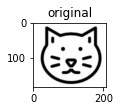

In [7]:
plt.subplot(3,2,1) #3행 2열로 분할 후 첫번째 위치 선택
plt.title("original")
plt.imshow(src)

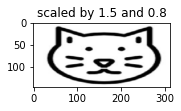

In [9]:
#x축 방향으로 1.5배 확대, y축 방향으로 0.8배 축소
a = np.array([[1.5, 0], [0, 0.8]])
dst = linear_transformation(src, a)
plt.subplot(3,2,2)
plt.title('scaled by 1.5 and 0.8')
plt.imshow(dst)

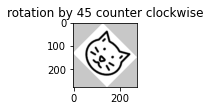

In [10]:
#반시계방향 45도 회전
alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
dst = linear_transformation(src, a)
plt.subplot(3,2,3)
plt.title("rotation by 45 counter clockwise")
plt.imshow(dst)

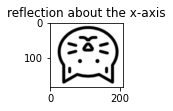

In [11]:
#x축을 기준으로 반사
a = np.array([[1,0], [0,-1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,1)
plt.title("reflection about the x-axis")
plt.imshow(dst)

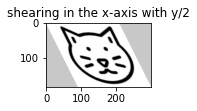

In [12]:
#x축을 방향으로 y/2 층밀림
a = np.array([[1, .5], [0, 1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,1)
plt.title("shearing in the x-axis with y/2")
plt.imshow(dst)

층밀림을 할 때, 영역에서 벗어나지 않게 하려고 역행렬을 픽셀에 적용 어쩌구 했는데
솔직히 못알아들었다.

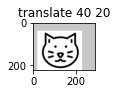

In [15]:
#x축 방향으로 40, y축 방향으로 20만큼 평행이동
dst = translate(src, [40,20])
plt.subplot(4,4,1)
plt.title("translate 40 20")
plt.imshow(dst)

2번, 계수구하기

In [17]:
from import pprint

In [23]:
A = np.eye(4)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(A)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])


In [24]:
print("rank A", np.linalg.matrix_rank(A))

rank A 4


In [26]:
B = np.zeros((3,3))
pp.pprint(B)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])


In [27]:
print("rank B", np.linalg.matrix_rank(B))

rank B 0


In [28]:
C = np.array([[2,5,-3,-4,8],
            [4,7,-4,-3,9],
            [6,9,-5,2,4],
            [0,-9,6,5,-6]])
pp.pprint(C)

array([[ 2,  5, -3, -4,  8],
       [ 4,  7, -4, -3,  9],
       [ 6,  9, -5,  2,  4],
       [ 0, -9,  6,  5, -6]])


In [29]:
print("rank C", np.linalg.matrix_rank(C))

rank C 3


In [31]:
CT = C.T
#or np.transpose(C)
pp.pprint(CT)

array([[ 2,  4,  6,  0],
       [ 5,  7,  9, -9],
       [-3, -4, -5,  6],
       [-4, -3,  2,  5],
       [ 8,  9,  4, -6]])


In [32]:
print("rank CT", np.linalg.matrix_rank(CT))

rank CT 3
